# Configuring Dependencies

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_parquet("../data/processed/final_dataset_Bogor.parquet.gzip")
df

,time,street,level,median_length,median_delay,median_speed_kmh,median_regular_speed,median_delay_seconds,rain_intensity,holiday_gap,time_series_split,classification_split
0,2022-07-06 09:00:00,Surya Kencana,3,744.000000,214.000000,9.310000,9.310000,214.000000,0.0,3,train,train
1,2022-07-06 09:00:00,RE Martadinata,0,1555.620467,7.893071,25.423729,25.423729,7.893071,0.0,3,train,train
2,2022-07-06 09:00:00,Binamarga,0,1617.307692,8.365385,29.346154,29.346154,8.365385,0.0,3,train,train
3,2022-07-06 09:00:00,Jenderal Sudirman,3,461.000000,80.000000,13.350000,13.350000,80.000000,0.0,3,train,train
4,2022-07-06 09:00:00,Taman Cimanggu Raya,0,2047.916667,9.375000,33.583333,33.583333,9.375000,0.0,3,train,train
...,...,...,...,...,...,...,...,...,...,...,...,...
66833,2022-09-04 21:00:00,Cilebut Raya,0,1439.817561,11.573804,23.706937,19.270000,60.500000,0.0,-1,test,test
66834,2022-09-04 21:00:00,Semplak Raya,3,539.000000,152.000000,8.610000,19.470000,79.000000,0.0,-1,test,test
66835,2022-09-04 21:00:00,Pahlawan,0,1799.920448,9.599060,32.400000,19.705000,74.000000,0.0,-1,test,test
66836,2022-09-04 21:00:00,N9 KH Soleh Iskandar,3,442.000000,108.000000,11.540000,23.987499,76.000000,0.0,-1,test,test


# Overview EDA

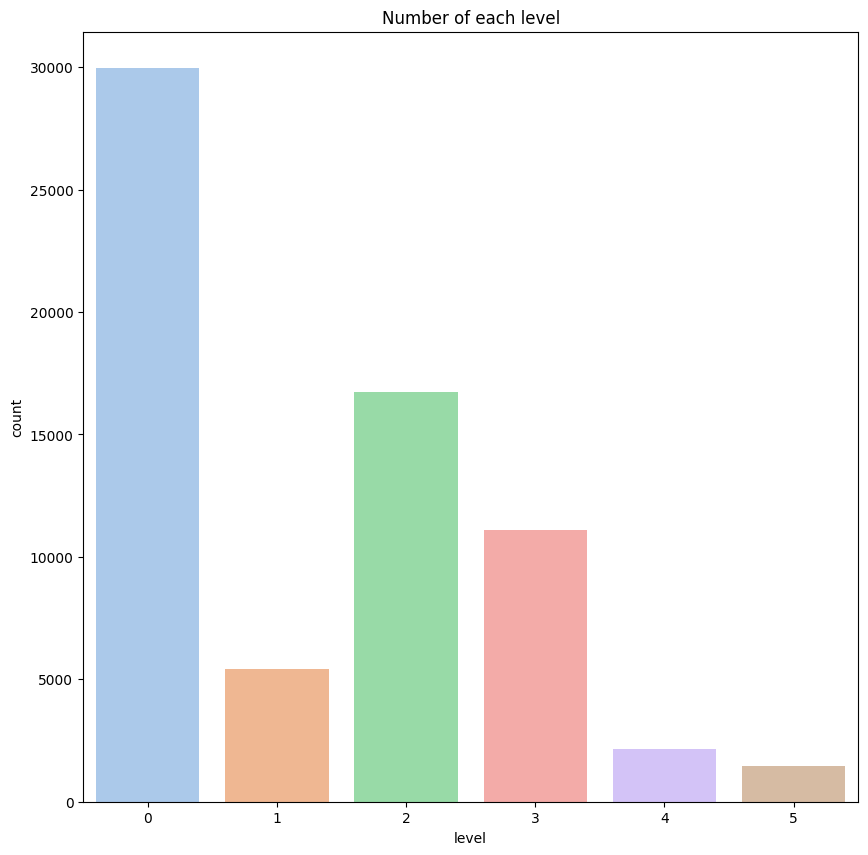

In [6]:
plt.figure(figsize=(10, 10))
sns.countplot(x='level', data=df, palette='pastel')
plt.title("Number of each level")
plt.show()

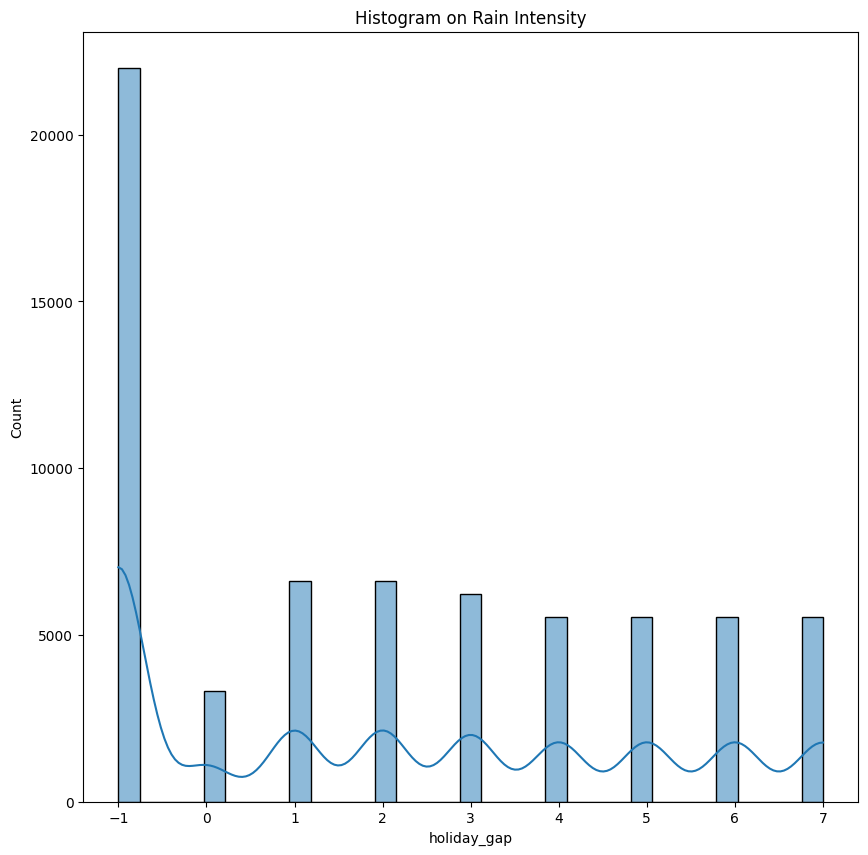

In [11]:
plt.figure(figsize=(10, 10))
sns.histplot(df['holiday_gap'], kde=True)
plt.title("Histogram on Rain Intensity")
plt.show()

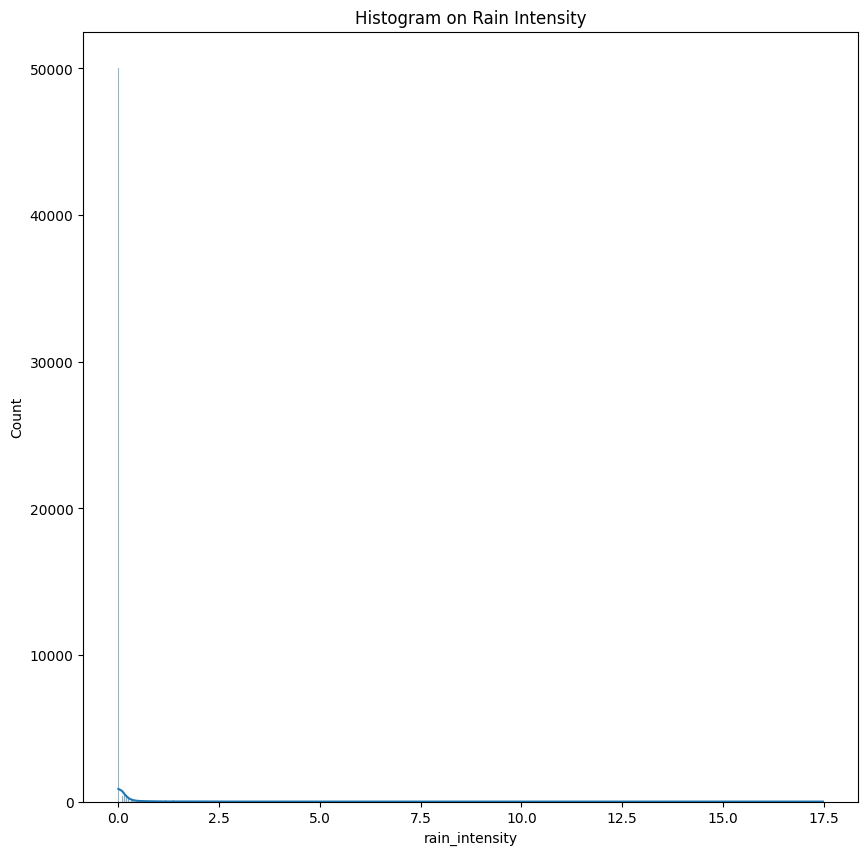

In [9]:
plt.figure(figsize=(10, 10))
sns.histplot(df['rain_intensity'], kde=True)
plt.title("Histogram on Rain Intensity")
plt.show()

In [12]:
df.loc[:,['level', 'rain_intensity', 'holiday_gap']].corr()

,level,rain_intensity,holiday_gap
level,1.000000,0.031254,0.006299
rain_intensity,0.031254,1.000000,0.151361
holiday_gap,0.006299,0.151361,1.000000


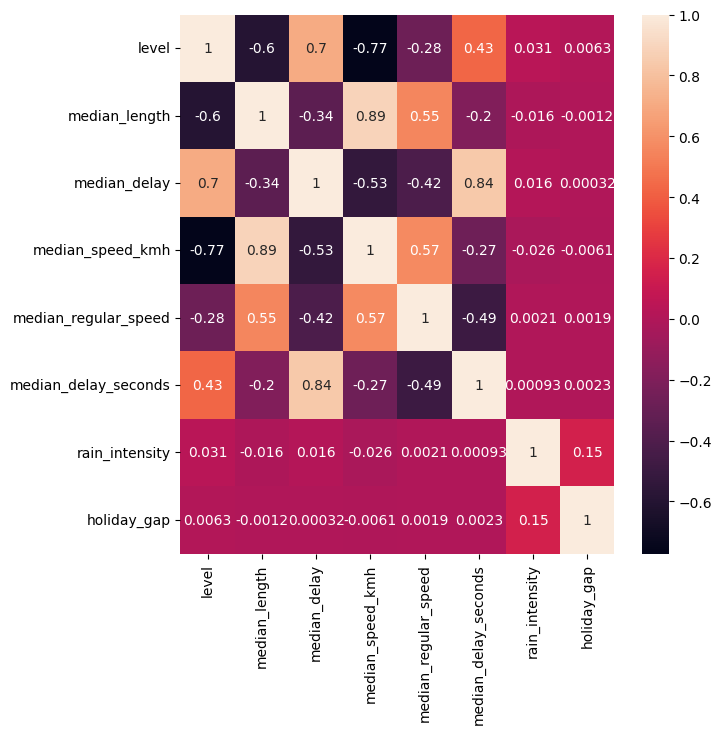

In [17]:
lst_feature = list(df.columns)[2:-2]
feature_df = df.loc[:, lst_feature]

feature_corr = feature_df.corr()

plt.figure(figsize=(7, 7))
sns.heatmap(feature_corr, annot=True)
plt.show()

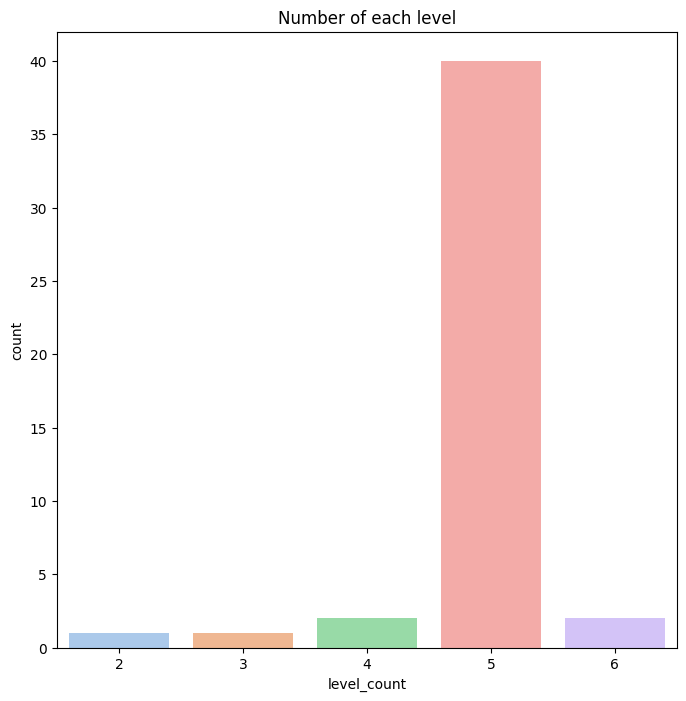

In [25]:
lst_street = set(df['street'])

data = []

for street in lst_street:
    used_df = df[df['street'] == street]
    data.append([
        street,
        len(used_df['level'].value_counts().keys())
    ])

count_level_df = pd.DataFrame(data=data, columns=['street', 'level_count'])

plt.figure(figsize=(8, 8))
sns.countplot(x='level_count', data=count_level_df, palette='pastel')
plt.title("Number of each level")
plt.show()

# Time Series Analysis

In [54]:
sample_street = 'Surya Kencana'

sampled_df = df[df['street'] == sample_street]
sampled_df_per_day = sampled_df[(sampled_df['time'] >= '2022-07-08') & (sampled_df['time'] < '2022-07-09')]

def plot_time_series_data(df, attr):
    plt.figure(figsize=(20, 8))
    sns.lineplot(x='time', y=attr, data=df)
    plt.show()

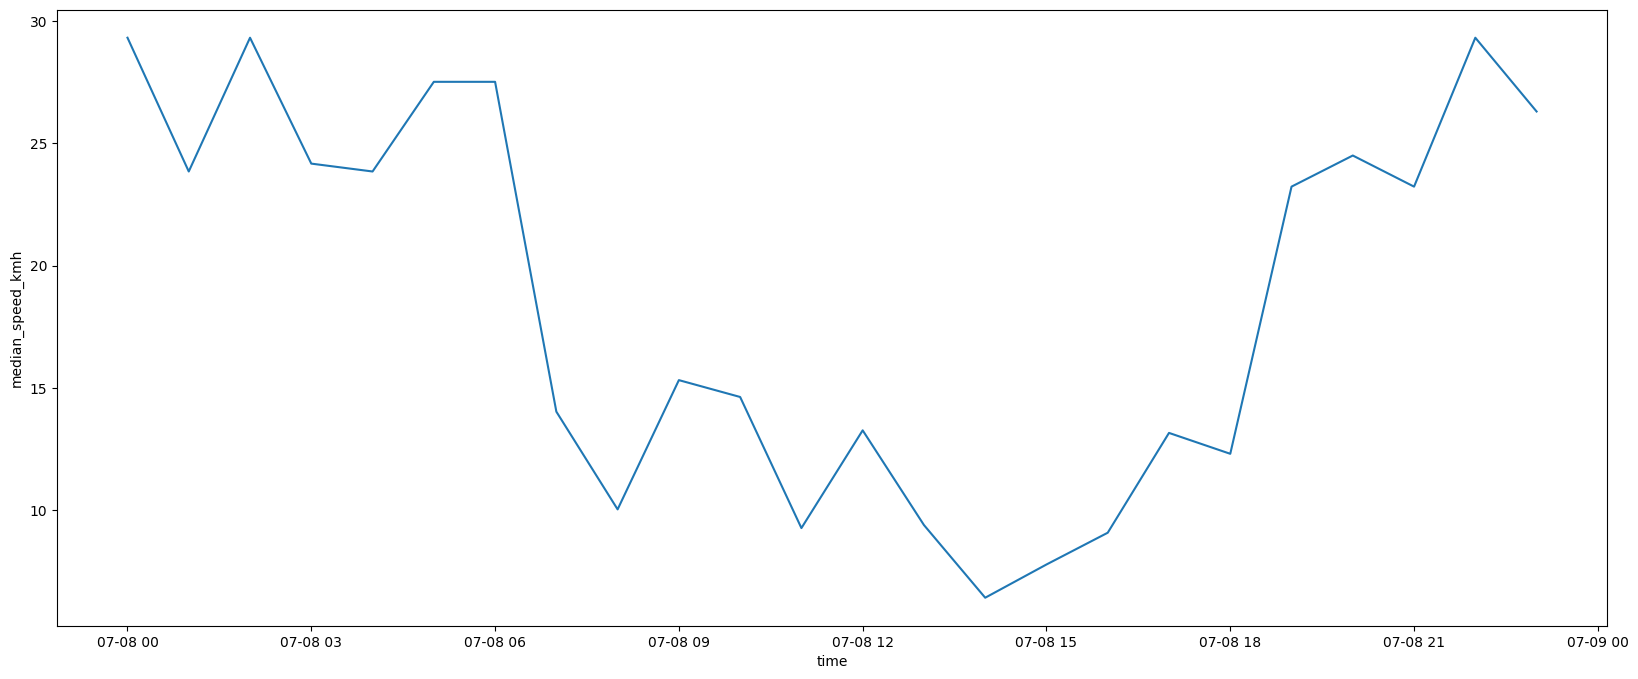

In [56]:
plot_time_series_data(sampled_df_per_day, 'median_speed_kmh')

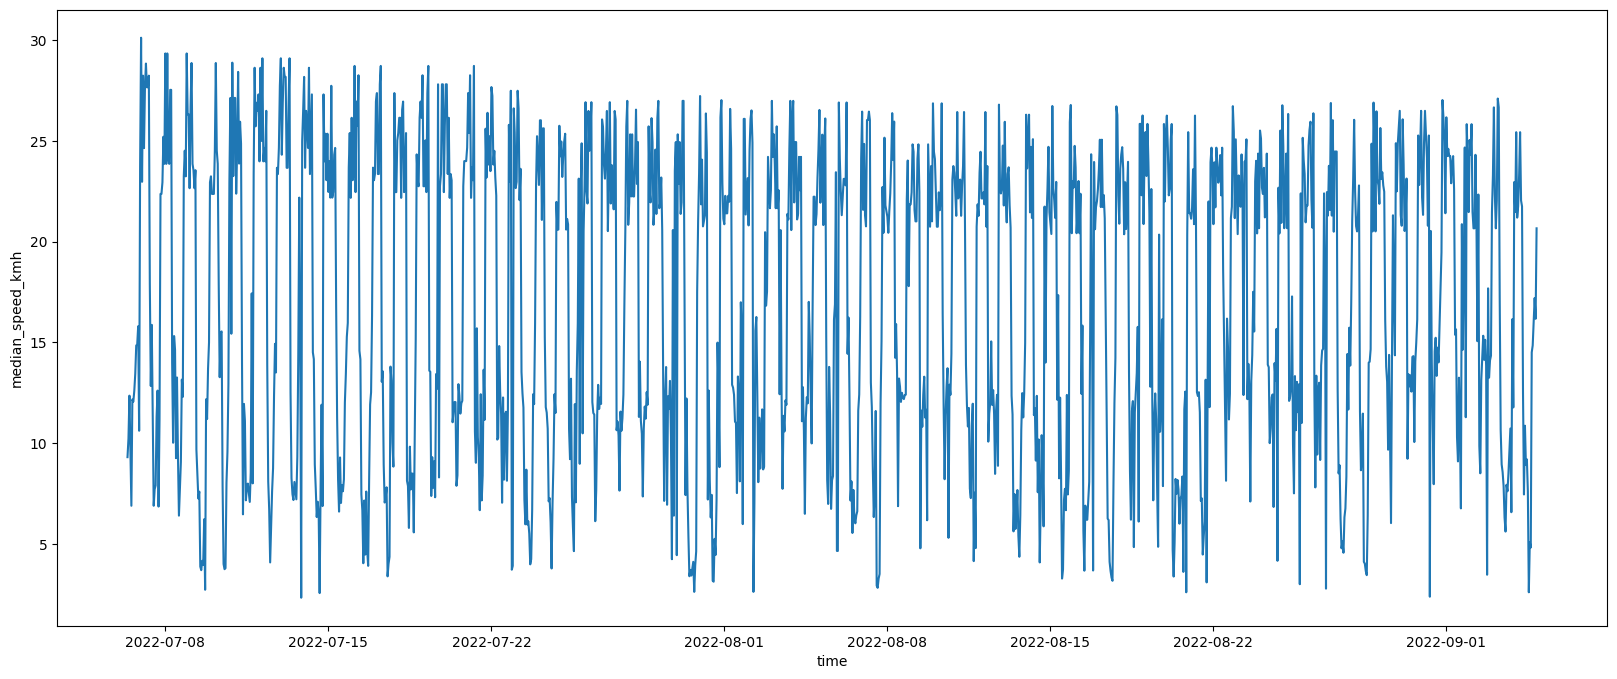

In [31]:
plot_time_series_data(sampled_df, 'median_speed_kmh')

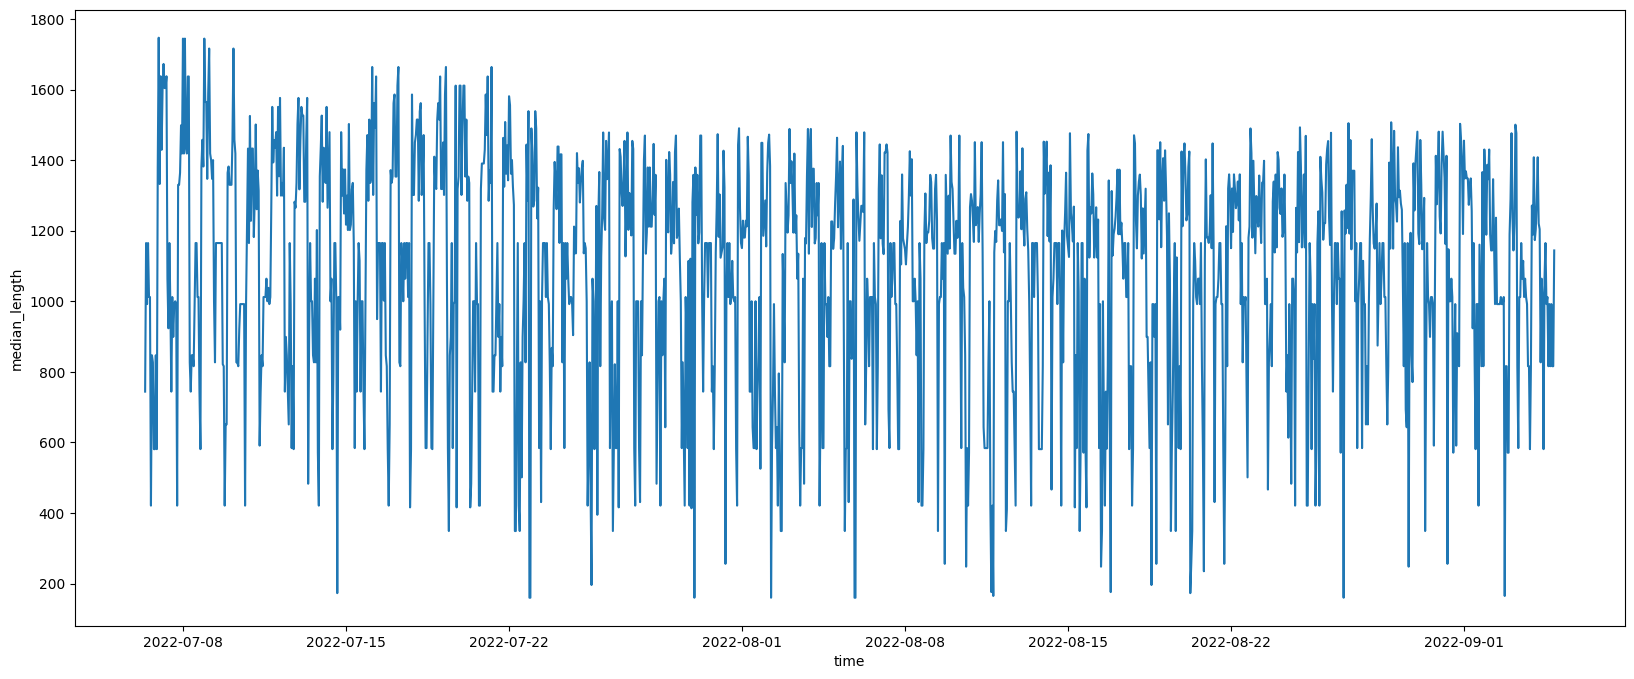

In [32]:
plot_time_series_data(sampled_df, 'median_length')

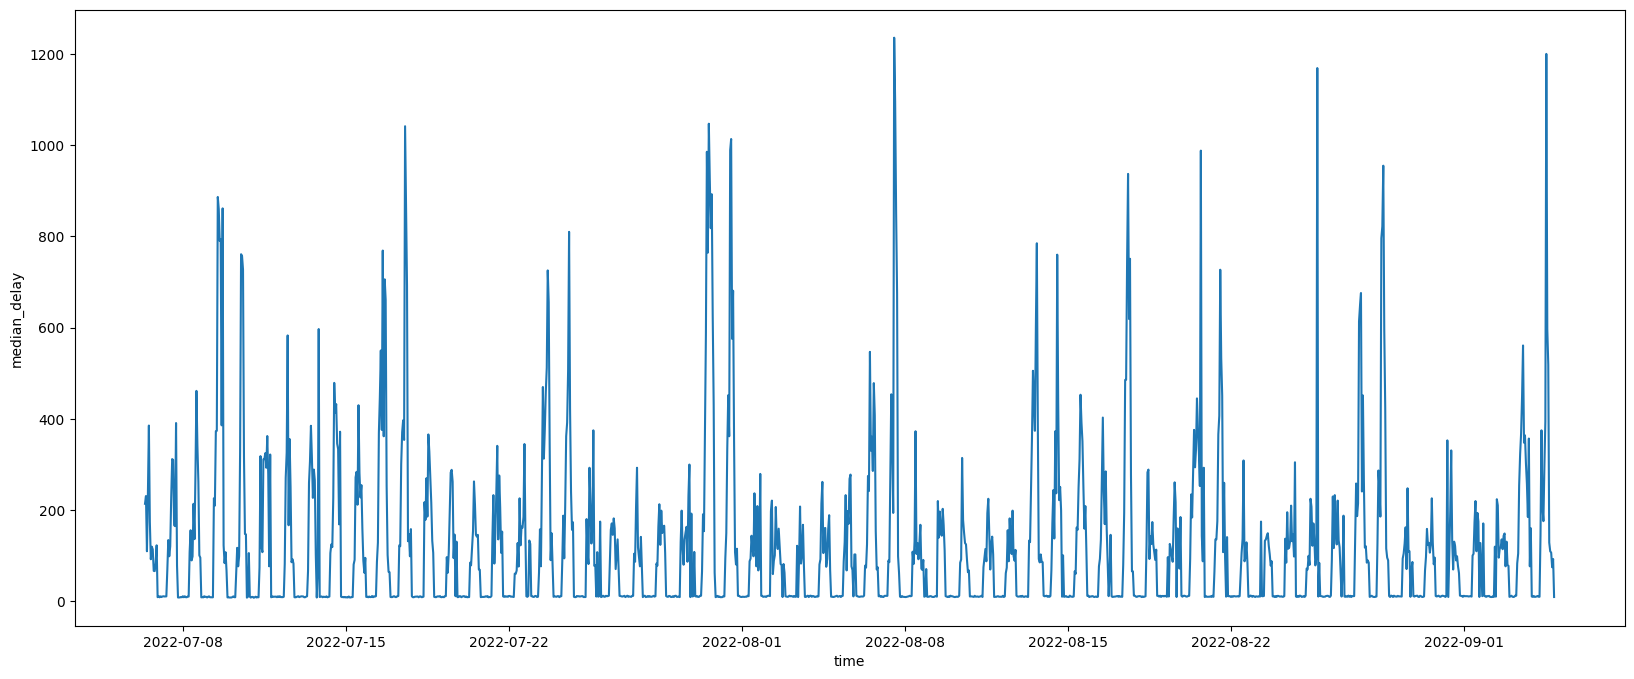

In [33]:
plot_time_series_data(sampled_df, 'median_delay')

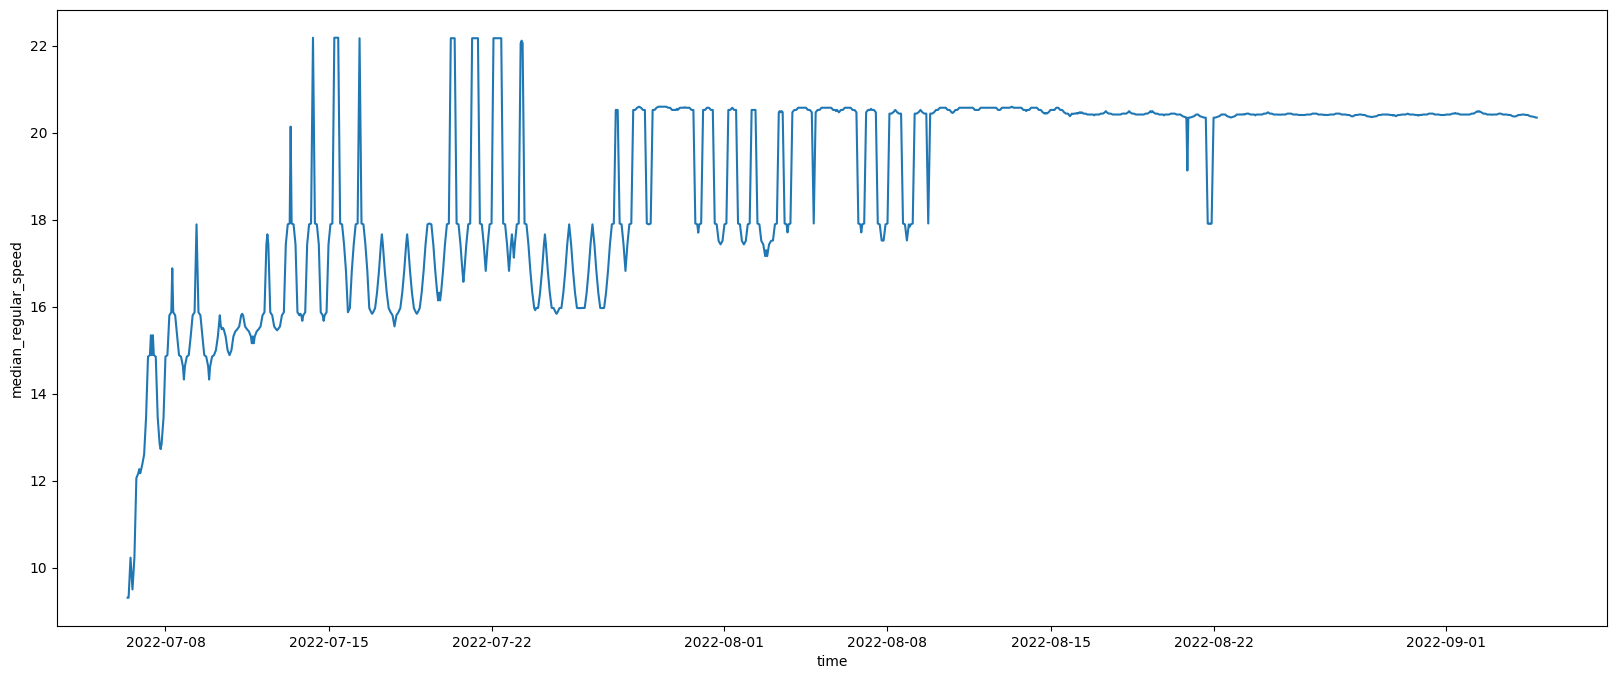

In [34]:
plot_time_series_data(sampled_df, 'median_regular_speed')

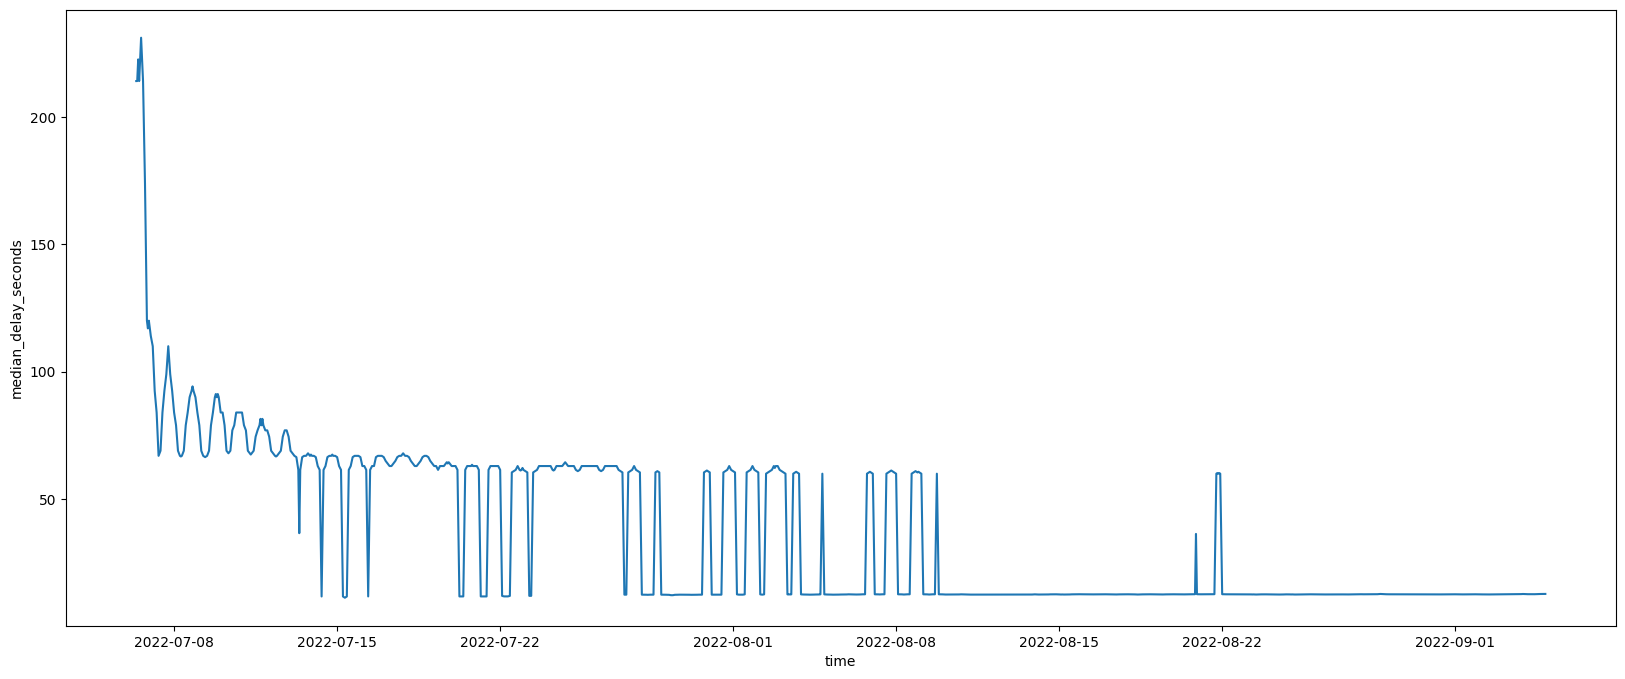

In [35]:
plot_time_series_data(sampled_df, 'median_delay_seconds')

In [37]:
def adfuller_test(df, attr, alpha=0.05):
    lst_street = set(df['street'])
    data = []
    for street in lst_street:
        used_df = df[df['street'] == street]
        test_result = adfuller(used_df[attr], autolag='AIC')
        p_value = test_result[1]
        result = 'Stationary' if p_value <= alpha else 'Non-Stationary'
        data.append([
            street,
            result
        ]) 
    return pd.DataFrame(data=data, columns=['street', 'status'])

In [40]:
df.columns

Index(['time', 'street', 'level', 'median_length', 'median_delay',
       'median_speed_kmh', 'median_regular_speed', 'median_delay_seconds',
       'rain_intensity', 'holiday_gap', 'time_series_split',
       'classification_split'],
      dtype='object')

In [39]:
res = adfuller_test(df, 'median_speed_kmh')
res['status'].value_counts()

Stationary    46
Name: status, dtype: int64

In [41]:
res = adfuller_test(df, 'median_length')
res['status'].value_counts()

Stationary        45
Non-Stationary     1
Name: status, dtype: int64

In [42]:
res = adfuller_test(df, 'median_delay')
res['status'].value_counts()

Stationary        45
Non-Stationary     1
Name: status, dtype: int64

In [43]:
res = adfuller_test(df, 'median_regular_speed')
res['status'].value_counts()

d:\DSLS\Mini Project\Data Scientist\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Stationary        25
Non-Stationary    21
Name: status, dtype: int64

In [44]:
res = adfuller_test(df, 'median_delay_seconds')
res['status'].value_counts()

Stationary        32
Non-Stationary    14
Name: status, dtype: int64